In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [9]:
# matplotlib 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # Mac 사용자는 AppleGothic
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 설정

# 1. 데이터 불러오기
data = pd.read_csv('./data/data.csv')

# 2. 데이터 전처리
data['Engagement'] = data['Level'].map(lambda x: 1 if x == 'AE' else 0) # AE: High, NE/PE: Low

# X, y 분리
X = data.drop(columns=['Level', 'Engagement'])
y = data['Engagement']

# 학습, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 4. 모델 평가
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # AUC를 위한 확률 예측값

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# 결과 출력
print(f"정확도(Accuracy): {accuracy:.4f}")
print(f"재현율(Recall): {recall:.4f}")
print(f"정밀도(Precision): {precision:.4f}")
print(f"F1 점수(F1 Score): {f1:.4f}")
print(f"AUC: {auc:.4f}")

정확도(Accuracy): 0.9000
재현율(Recall): 0.8571
정밀도(Precision): 0.8571
F1 점수(F1 Score): 0.8571
AUC: 0.9560



Confusion Matrix:


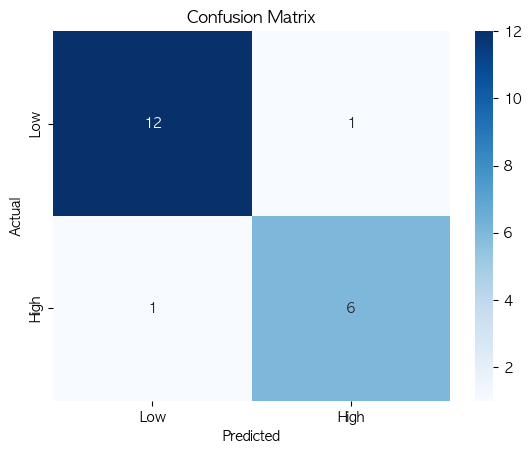

In [7]:
# 5. 혼동 행렬
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

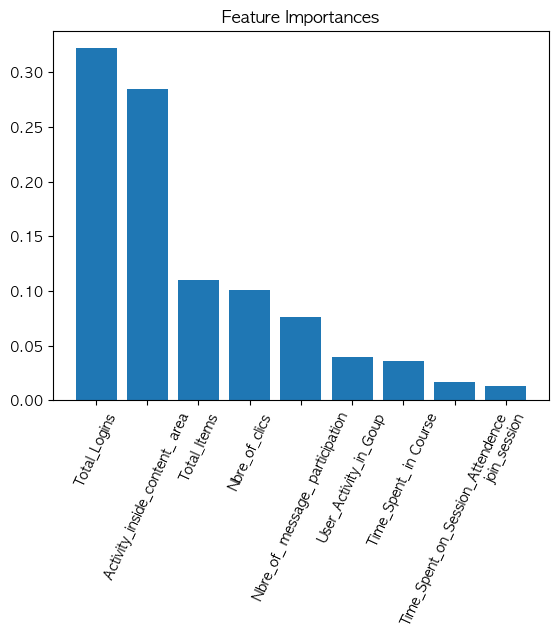

In [6]:
# 6. 특징 중요도 시각화
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances')
plt.xticks(rotation=65)
plt.show()